## Logistic Regression for predicting Tumor outgrow to Cancer

In [2]:
import pandas as pd


cancer_df = pd.read_csv('../data/cancerPred.csv')

cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Analysis

### Task: 
We have to predict the column wether the person's tumor in the future will result in cancer or not based on the values and features of the tumor

### Data:
Diagnosis column has 2 unique values M for malignant and B benign --> We need to predict this

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
import plotly.express as px

px.histogram(cancer_df, x='radius_mean', color='diagnosis')

In [ ]:
cancer_df.columns

# We need to drop id and unnamed: 32 columns as they should not be in training part

cancer_df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Replace M and B with 0 and 1

In [20]:
cancer_df['diagnosis'].replace({"M": 1, "B": 0}, inplace=True)
cancer_df.diagnosis

C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_16308\1339305973.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Text(0.5, 1.0, 'Correlation Map')

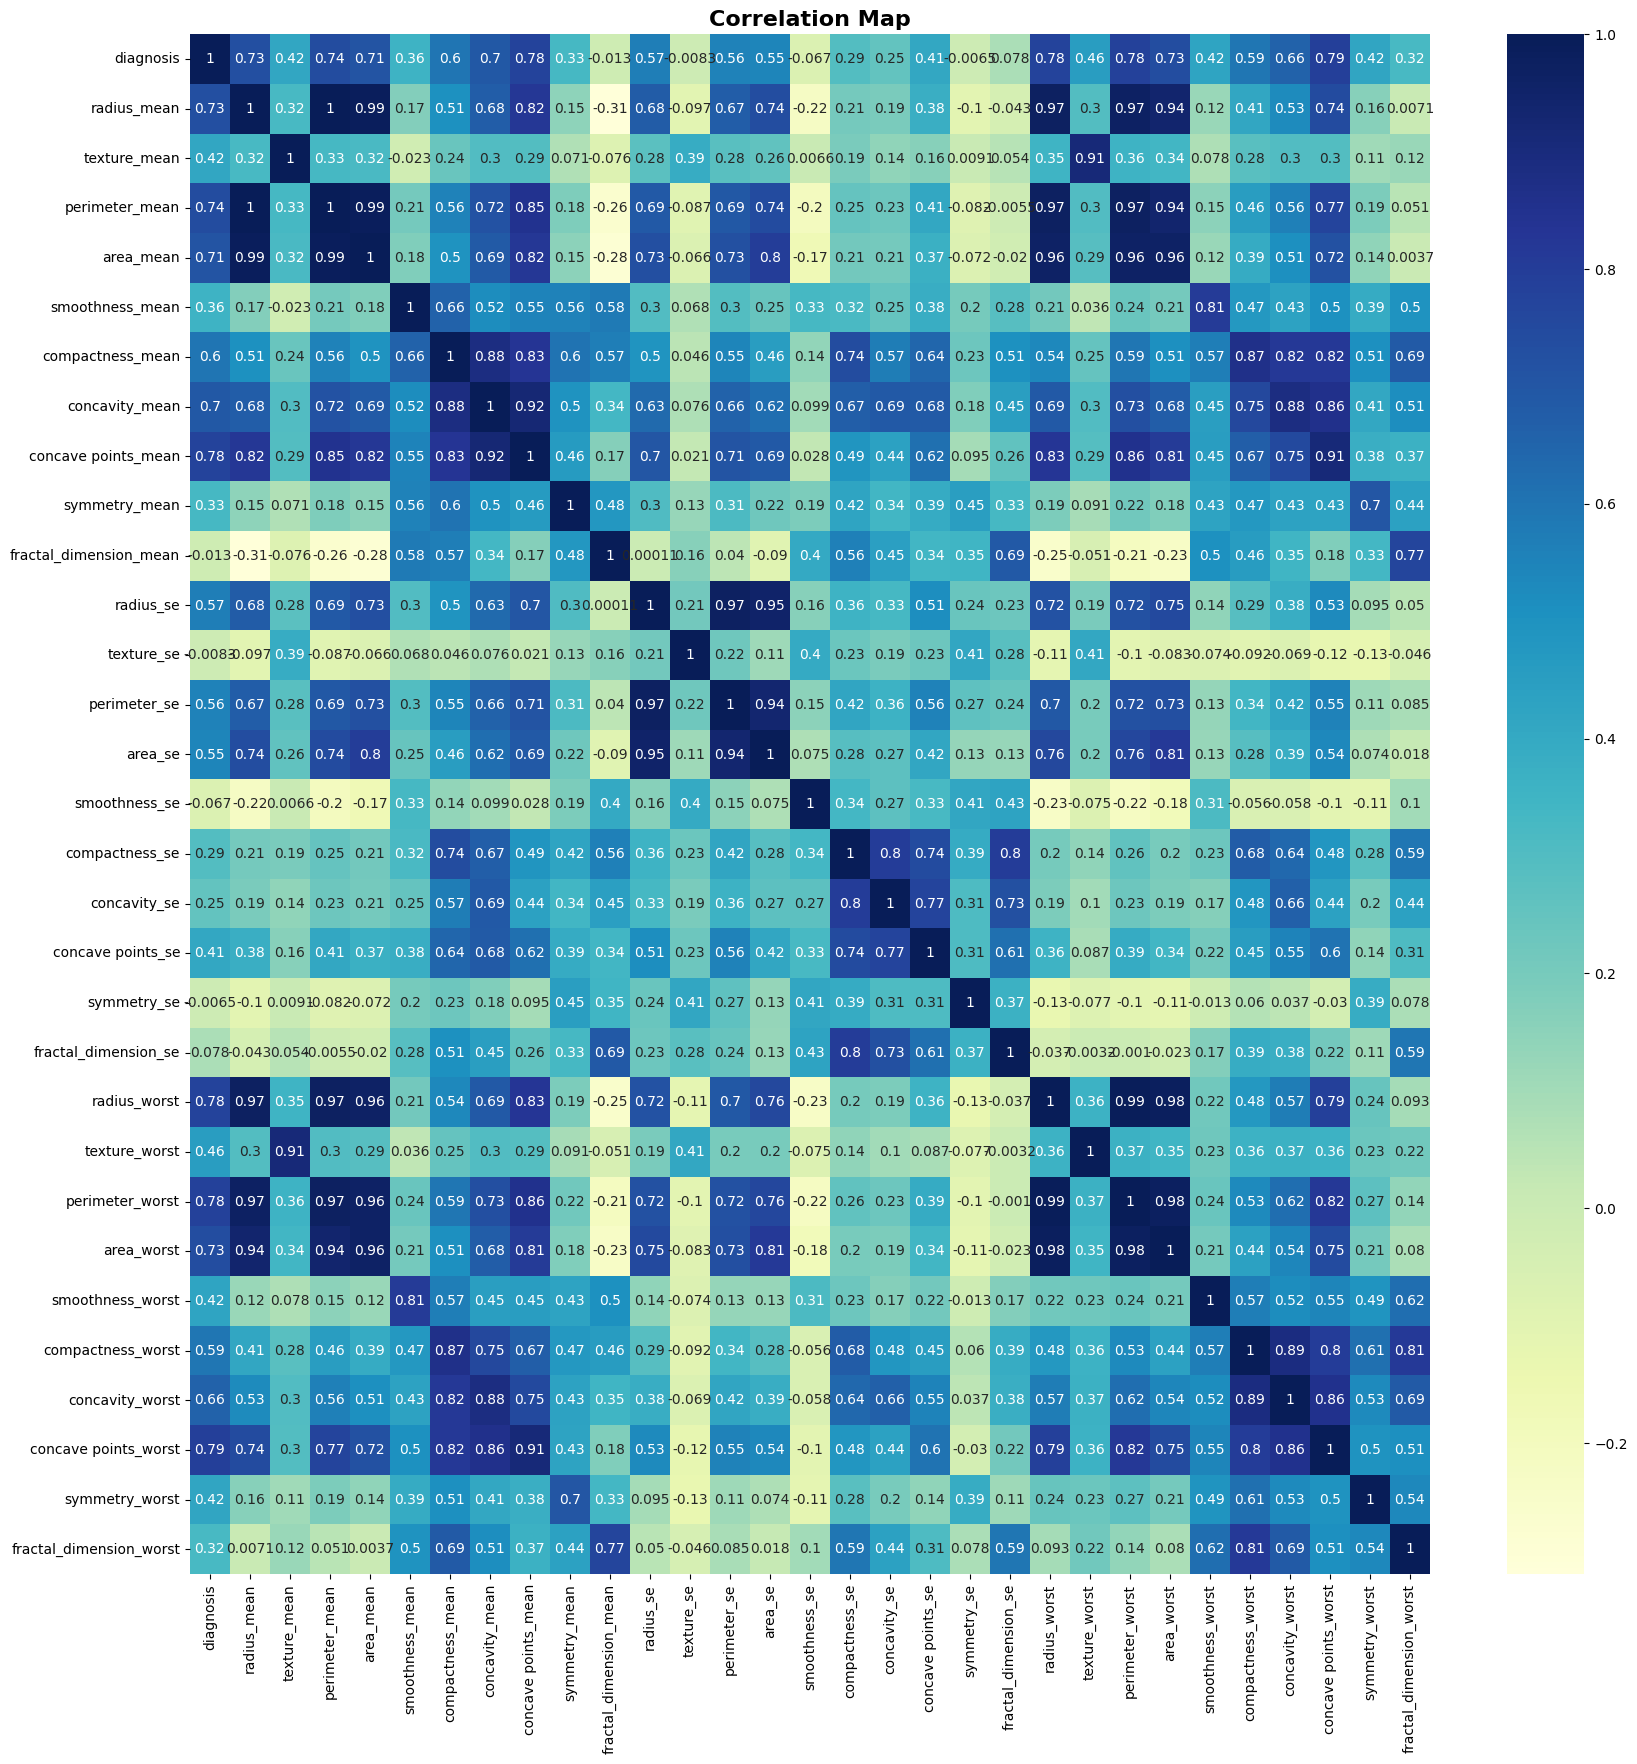

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = cancer_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

### From here we are only interested on the first columns as we need correlation of features with diagnosis column.

### Most Important columns are then:
1. Concave_points_worst, concavity_worst, area_worst and etc as they have correlation > 0.60 or so


In [ ]:
high_corr_features = corr[corr > 0.5].index.tolist()

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [50]:
X = cancer_df[high_corr_features].drop('diagnosis', axis=1)
y = cancer_df['diagnosis']

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_scaled, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
model.coef_

model.score(X_scaled,y)

0.9578207381370826

## Model Accuracy when features selected using df.corr()

**0.9578207381370826**


In [89]:
from sklearn.feature_selection import RFE

X = cancer_df.drop('diagnosis', axis=1)
y = cancer_df['diagnosis']



In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [91]:
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print(selected_features.tolist())

['concave points_mean', 'radius_se', 'area_se', 'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [92]:
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_
}).sort_values(by='Rank')
print(feature_ranking)

                    Feature  Rank
7       concave points_mean     1
15           compactness_se     1
13                  area_se     1
10                radius_se     1
20             radius_worst     1
21            texture_worst     1
22          perimeter_worst     1
23               area_worst     1
27     concave points_worst     1
26          concavity_worst     1
24         smoothness_worst     2
3                 area_mean     3
12             perimeter_se     4
5          compactness_mean     5
28           symmetry_worst     6
0               radius_mean     7
6            concavity_mean     8
1              texture_mean     9
2            perimeter_mean    10
19     fractal_dimension_se    11
18              symmetry_se    12
14            smoothness_se    13
29  fractal_dimension_worst    14
9    fractal_dimension_mean    15
17        concave points_se    16
11               texture_se    17
4           smoothness_mean    18
16             concavity_se    19
8             

In [93]:
from sklearn.model_selection import train_test_split

X_selected = X_scaled[:, rfe.support_]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
print("Model accuracy:", model.score(X_test, y_test))


Model accuracy: 0.9736842105263158


## Model Accuracy when features selected using Recursive Feature Elimination(RFE)
**0.9736842105263158**<br>
2.smht % better accuracy acheived 

In [94]:
X_selected = X_scaled[:, rfe.support_]
X.columns[rfe.support_]

Index(['concave points_mean', 'radius_se', 'area_se', 'compactness_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [95]:
import numpy as np

sample = np.array([ 
    123.99, 1.38, 122.80, 1001.0, 0.1184, 0.2776, 0.3001,
    0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4,
    0.0064, 0.049, 53, 0.0158, 0.03, 0.0061, 25.38, 
    17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.4, 
    0.4601, 00
])  

# (1) reshape → (1 sample, n_features)
sample = sample.reshape(1, -1)

# (2) scale it using the same scaler used during training
sample_scaled = scaler.transform(sample)

# (3) select the same features RFE picked
sample_selected = sample_scaled[:, rfe.support_]

# (4) predict!
prediction = model.predict(sample_selected)

if prediction[0] == 1:
    print("🔴 Malignant (Cancer Detected)")
else:
    print("🟢 Benign (No Cancer)")

print(prediction)

🔴 Malignant (Cancer Detected)
[1]


d:\python projects\MachineLearning\LinearRegression\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [96]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Saving the trained mode

In [ ]:
# import joblib
# joblib.dump(model, "../data/breast_cancer_model.pkl")
# joblib.dump(scaler, "../data/scaler.pkl")
# joblib.dump(rfe, "../data/rfe.pkl")

['../data/rfe.pkl']

## Example usage of joblib

In [ ]:
import joblib
import numpy as np

# Load saved objects
model = joblib.load("../data/breast_cancer_model.pkl")
scaler = joblib.load("../data/scaler.pkl")
rfe = joblib.load("../data/rfe.pkl")

# Example: new patient sample
sample = np.array([
    17.99, 10.38, 122.80, 1001.0, 0.1184, 0.2776, 0.3001,
    0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4,
    0.0064, 0.049, 0.053, 0.0158, 0.03, 0.0061, 25.38, 
    17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 
    0.4601, 0.1189
])

# Preprocess same as training
sample = sample.reshape(1, -1)
sample_scaled = scaler.transform(sample)
sample_selected = sample_scaled[:, rfe.support_]

# Predict
prediction = model.predict(sample_selected)[0]
print("Prediction:", "🔴 Malignant" if prediction == 1 else "🟢 Benign")


Prediction: 🟢 Benign


d:\python projects\MachineLearning\LinearRegression\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

